In [1]:
using CSV, DataFrames
using Plots,StatsBase
using DataStructures

include("./src/cubes.jl")
include("./src/network.jl")

add_properties (generic function with 1 method)

In [2]:
region="japan"

# Read data
path = "./data/"
filepath = path * region * ".csv"
df = CSV.read(filepath, DataFrame);

# Make path for results
mkpath("./results/$region")

cell_size = 5;

df, df_cubes = region_cube_split(df,cell_size=cell_size)
MG = create_network(df, df_cubes)

degrees=[]
outdegrees=[]
indegrees=[]
for i in 1:nv(MG)
    push!(degrees, get_prop(MG, i, :degree))
    push!(outdegrees, get_prop(MG, i, :outdegree))
    push!(indegrees, get_prop(MG, i, :indegree))
end

# Density Plot

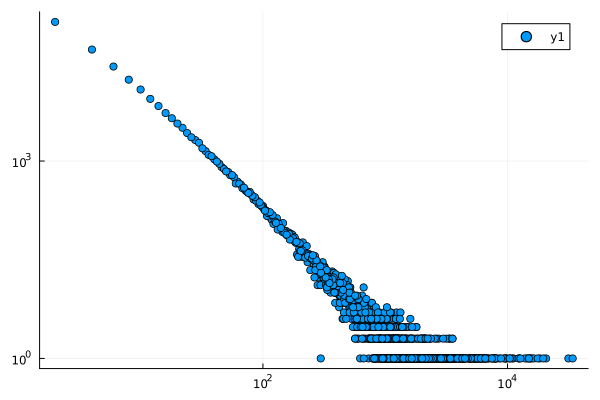

In [4]:
d = counter(degrees)
Plots.scatter(collect(keys(d)),collect(values(d)),xscale=:log10,yscale=:log10)

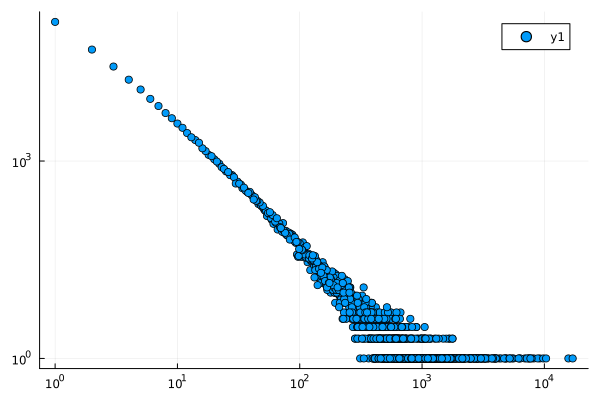

In [5]:
ind = counter(indegrees)
Plots.scatter(collect(keys(ind)),collect(values(ind)),xscale=:log10,yscale=:log10)

In [7]:
len = Int(ceil(sqrt(length(indegrees))))

554

In [9]:
length(indegrees)/len

553.4458483754513

In [11]:
b = minimum(indegrees) : Int(ceil(length(indegrees)/len)) : maximum(indegrees)

1:554:16621

In [17]:
b = 2 .^ (0:14)

15-element Vector{Int64}:
     1
     2
     4
     8
    16
    32
    64
   128
   256
   512
  1024
  2048
  4096
  8192
 16384

In [18]:
h = StatsBase.fit(Histogram{Float64}, indegrees, b)

Histogram{Float64, 1, Tuple{Vector{Int64}}}
edges:
  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
weights: [130018.0, 76657.0, 45081.0, 25671.0, 14027.0, 7723.0, 3877.0, 1914.0, 907.0, 451.0, 190.0, 67.0, 19.0, 6.0]
closed: left
isdensity: false

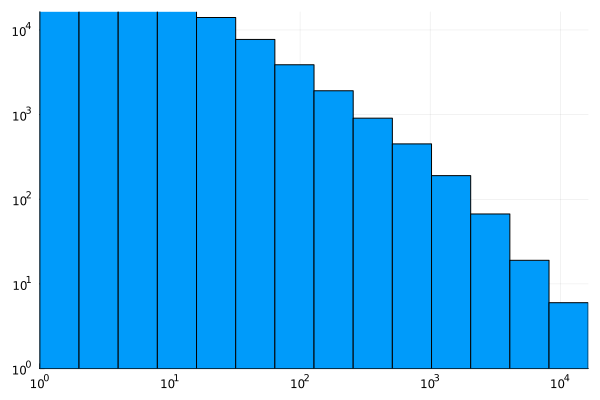

In [20]:
Plots.plot(h ; label="",xscale=:log10, yscale=:log10, xlim=extrema(b), ylim=extrema(b))

In [13]:
minimum(indegrees)

1

In [14]:
maximum(indegrees)

17036

In [16]:
range(-2,2,length=50)

-2.0:0.08163265306122448:2.0

In [17]:
collect(range(1,2,length=50))

50-element Vector{Float64}:
 -2.0
 -1.9183673469387754
 -1.836734693877551
 -1.7551020408163265
 -1.6734693877551021
 -1.5918367346938775
 -1.510204081632653
 -1.4285714285714286
 -1.346938775510204
 -1.2653061224489797
  ⋮
  1.346938775510204
  1.4285714285714286
  1.510204081632653
  1.5918367346938775
  1.6734693877551021
  1.7551020408163265
  1.836734693877551
  1.9183673469387754
  2.0

In [15]:
2 .^ (range(1,stop=17036,length=50))

50-element Vector{Float64}:
  2.0
  9.016323979830438e104
  4.064704905463269e209
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
  ⋮
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

In [24]:
bins = 2 .^ (0:14)

15-element Vector{Int64}:
     1
     2
     4
     8
    16
    32
    64
   128
   256
   512
  1024
  2048
  4096
  8192
 16384

In [26]:
maximum(indegrees)

17036

In [27]:
sqrt(maximum(indegrees))

130.52202879207786

In [5]:
b = 2.0 .^ (minimum(indegrees):maximum(indegrees))

17036-element Vector{Float64}:
     10.0
    100.0
   1000.0
  10000.0
 100000.0
      1.0e6
      1.0e7
      1.0e8
      1.0e9
      1.0e10
      ⋮
     Inf
     Inf
     Inf
     Inf
     Inf
     Inf
     Inf
     Inf
     Inf

In [28]:
h = StatsBase.fit(Histogram{Float64}, indegrees, bins)

Histogram{Float64, 1, Tuple{Vector{Int64}}}
edges:
  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
weights: [130018.0, 76657.0, 45081.0, 25671.0, 14027.0, 7723.0, 3877.0, 1914.0, 907.0, 451.0, 190.0, 67.0, 19.0, 6.0]
closed: left
isdensity: false

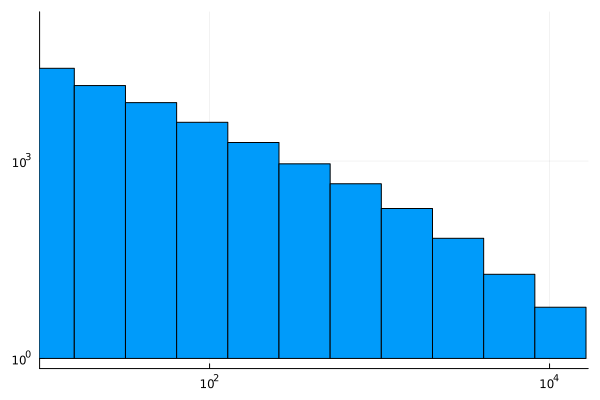

In [30]:
Plots.plot(h ; label="",xscale=:log10, xlim=extrema(b), yscale=:log10)

In [ ]:
# bstep = 2 * iqr(indegrees) * length(indegrees) ^ (-1/3)
# b = minimum(indegrees) : bstep : maximum(indegrees)
# h = StatsBase.fit(Histogram{Float64}, indegrees, b)